In [1]:
import numpy as np
import pandas as pd

In [3]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 294.9/294.9 kB 6.1 MB/s eta 0:00:00


In [4]:
# for data viz
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

# for the regression analysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [5]:
df = pd.read_csv("Dataset/movies_revenue_data.csv")
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
df['director'].value_counts()

director
Woody Allen         38
Clint Eastwood      31
Directors           28
Steven Spielberg    27
Ron Howard          24
                    ..
Marcelo Epstein      1
Thomas Rickman       1
Paolo Taviani        1
Lawrence Dane        1
Pereko Mosia         1
Name: count, Length: 2949, dtype: int64

In [7]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [8]:
df.shape

(7668, 15)

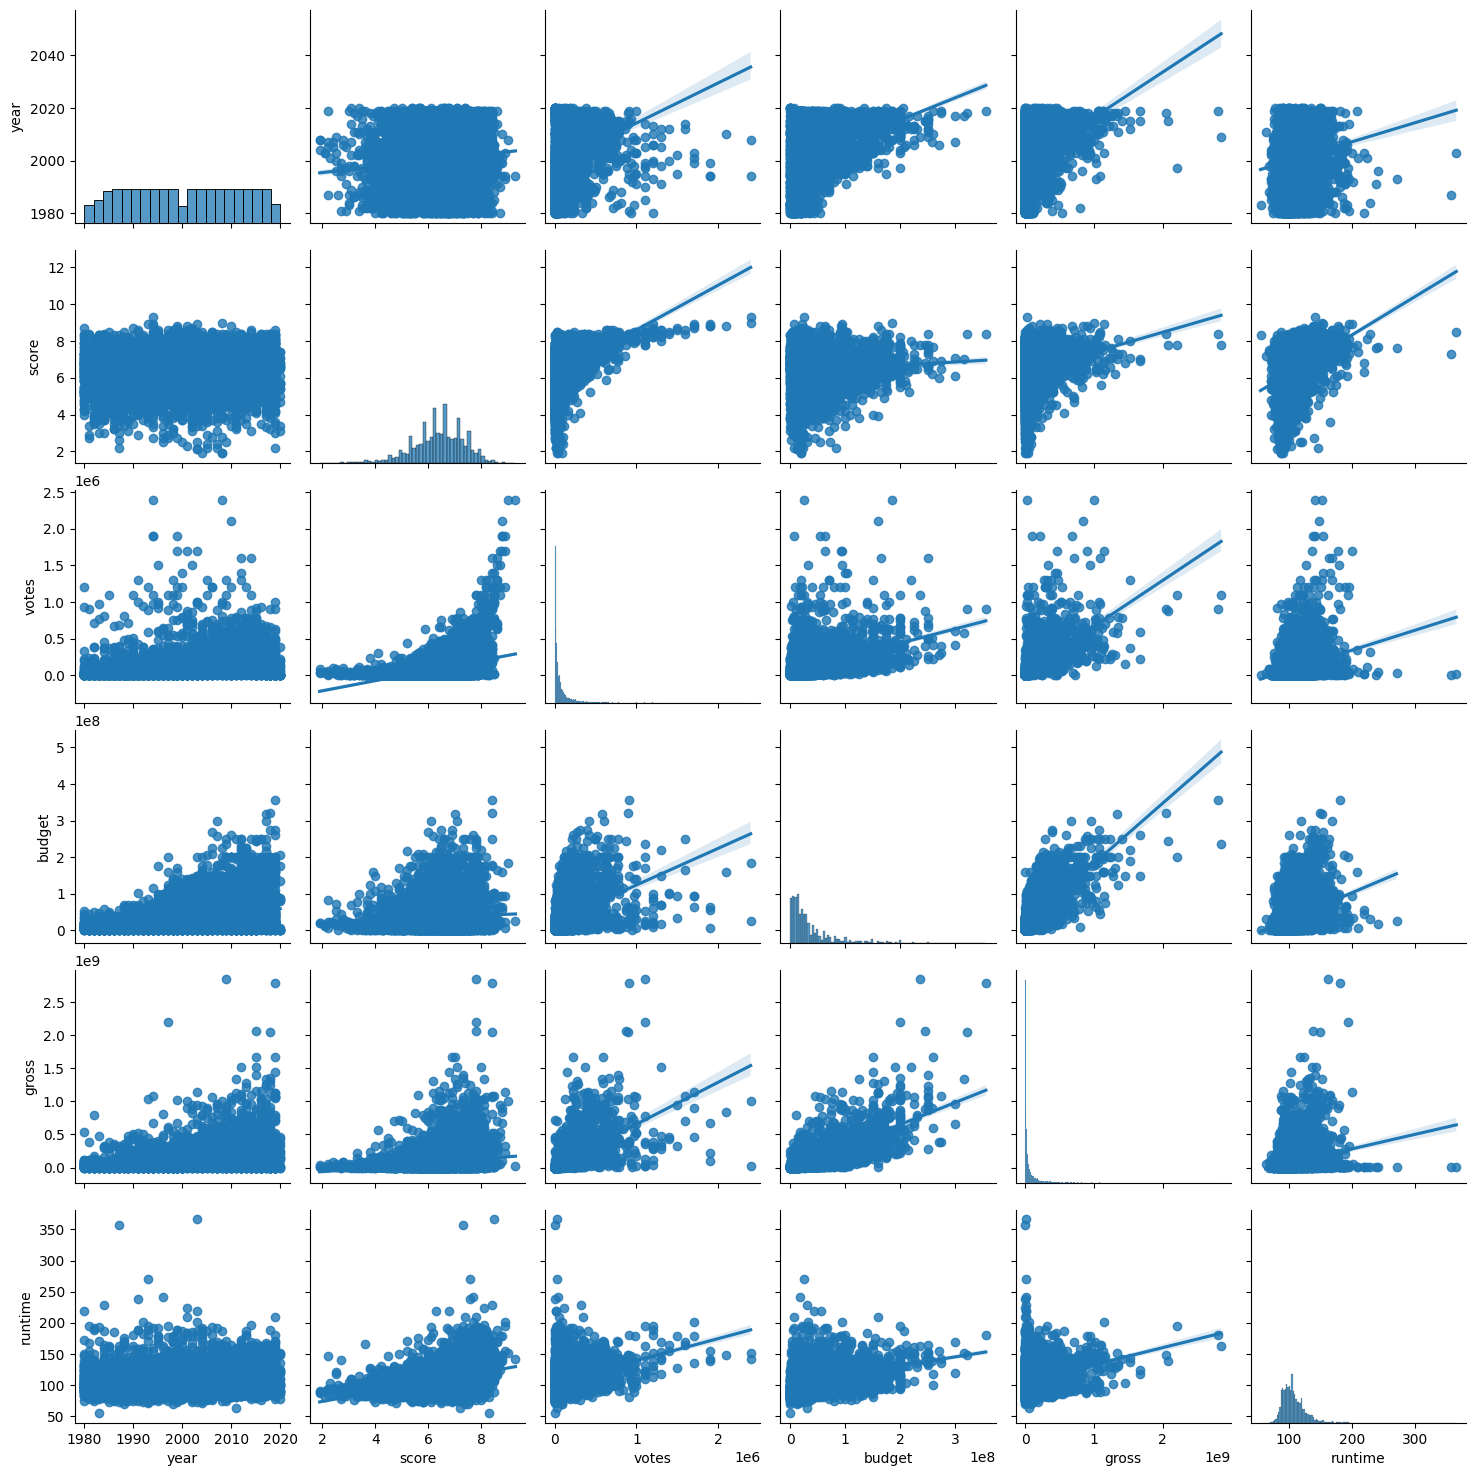

In [9]:
sns.pairplot(df,kind='reg')

In [10]:
feature_x = df[['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime']]
target_y = df.gross

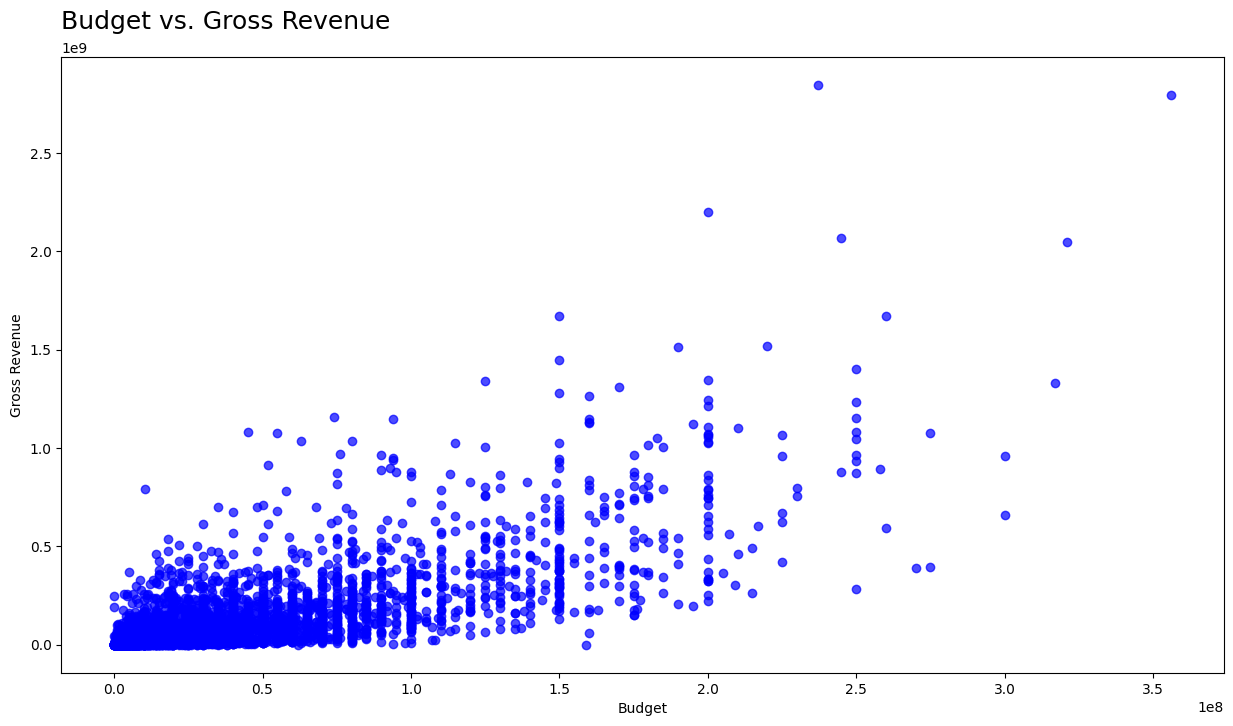

In [11]:
plt.figure(figsize=(15,8))
plt.scatter(x=df.budget, y=df.gross, color='b', alpha=.7);
plt.title('Budget vs. Gross Revenue', loc='left', fontsize=18, pad=20);
plt.xlabel('Budget');
plt.ylabel('Gross Revenue');

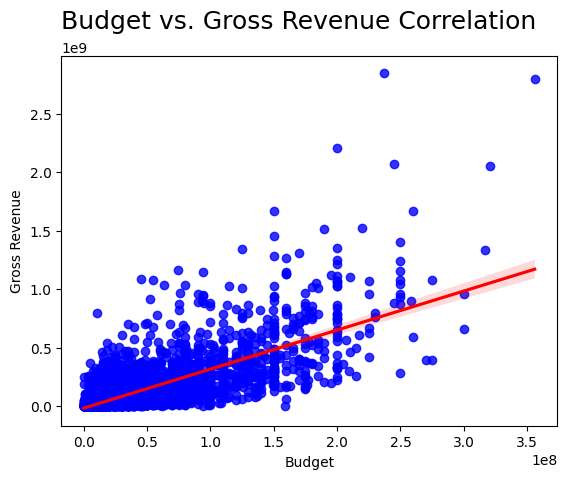

In [12]:

sns.regplot(data=df, x='budget', y='gross', color='b', line_kws={'color':'r'});
plt.title('Budget vs. Gross Revenue Correlation', loc='left', fontsize=18, pad=20);
plt.xlabel('Budget');
plt.ylabel('Gross Revenue');

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [14]:
df_num = df.copy()

for col in df_num.columns:
    if (df_num[col].dtype == 'object'):
        df_num[col] = df_num[col].astype('category')
        df_num[col] = df_num[col].cat.codes

df_num.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


In [15]:
df_num['director'].value_counts()

director
2913    38
507     31
726     28
2660    27
2432    24
        ..
1762     1
2736     1
2098     1
1664     1
2165     1
Name: count, Length: 2949, dtype: int64

In [16]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   int16  
 1   rating    7668 non-null   int8   
 2   genre     7668 non-null   int8   
 3   year      7668 non-null   int64  
 4   released  7668 non-null   int16  
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   int16  
 8   writer    7668 non-null   int16  
 9   star      7668 non-null   int16  
 10  country   7668 non-null   int8   
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7668 non-null   int16  
 14  runtime   7664 non-null   float64
dtypes: float64(5), int16(6), int64(1), int8(3)
memory usage: 471.9 KB


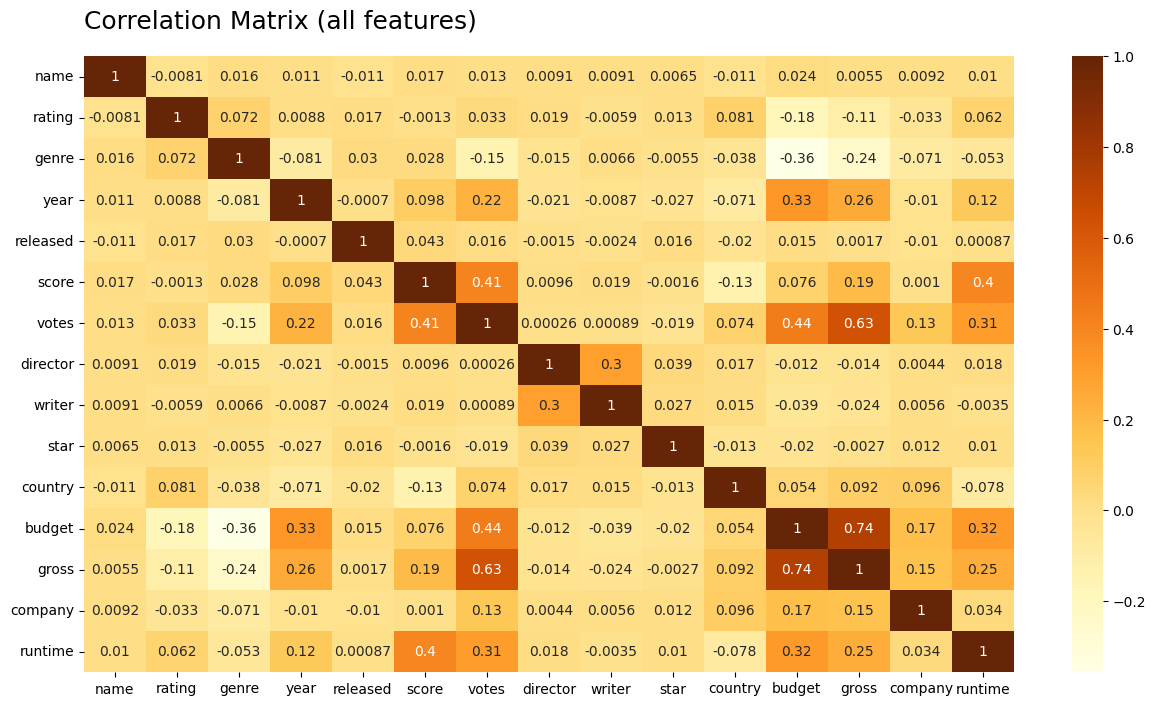

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(df_num.corr(method='pearson'), annot=True, cmap='YlOrBr');
plt.title('Correlation Matrix (all features)', loc='left', fontsize=18, pad=20);

In [18]:
corr_mat = df_num.corr().unstack().sort_values(ascending=False)
corr_mat[((corr_mat) > .3) & ((corr_mat) != 1)]

gross    budget     0.740395
budget   gross      0.740395
votes    gross      0.630757
gross    votes      0.630757
votes    budget     0.442429
budget   votes      0.442429
score    votes      0.409182
votes    score      0.409182
score    runtime    0.399451
runtime  score      0.399451
year     budget     0.329321
budget   year       0.329321
         runtime    0.320447
runtime  budget     0.320447
         votes      0.309212
votes    runtime    0.309212
dtype: float64

In [19]:
df_num_remove_null = df_num.dropna()
df_num_remove_null.isna().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [20]:
X = df_num_remove_null[['budget']]
Y = df_num_remove_null['gross']

In [21]:
X

,budget
0,19000000.0
1,4500000.0
2,18000000.0
3,3500000.0
4,6000000.0
...,...
7648,90000000.0
7649,85000000.0
7650,175000000.0
7651,135000000.0


<Axes: ylabel='Count'>

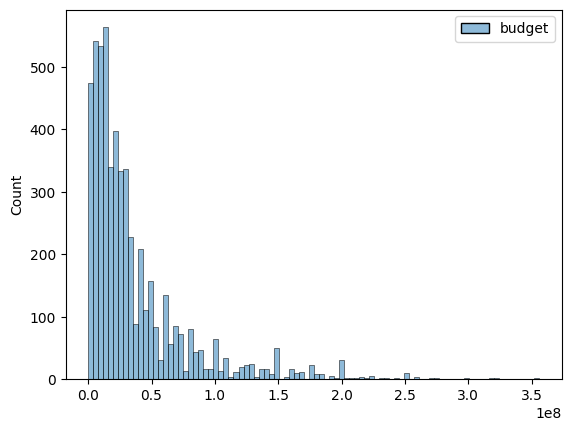

In [22]:
sns.histplot(X)

<Axes: xlabel='gross', ylabel='Count'>

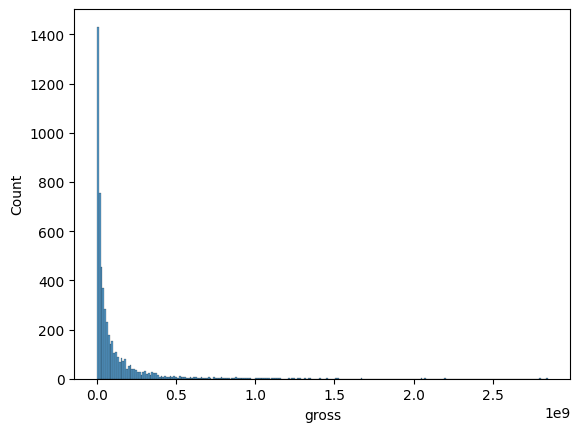

In [23]:
sns.histplot(Y)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

In [25]:
X_train.shape

(3641, 1)

In [26]:
X_test.shape

(1794, 1)

In [27]:
1794 + 3641

5435

In [28]:
7668 - 5435

2233

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
linreg = LinearRegression()

In [31]:
linreg.fit(X_train,y_train)

LinearRegression()

In [32]:
movies_budget = [[1]]

In [33]:
Predicted_revenue   = linreg.predict(movies_budget)

In [34]:
Predicted_revenue

array([2.38692376e+08])

In [35]:
movies_budget = [[100000]]

In [36]:
Predicted_revenue   = linreg.predict(movies_budget)

In [37]:
Predicted_revenue

array([1.37521035e+13])

In [38]:
100000*23

2300000

In [39]:
mlr_x = df_num_remove_null[['budget', 'votes', 'runtime', 'year', 'score']]
mlr_y = df_num_remove_null['gross']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(mlr_x, mlr_y, test_size=0.33, random_state=1)

In [41]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [43]:
movie_Data = [[1,9.5,1,2025,5.5]]

In [44]:
linreg.predict(movie_Data)

array([3.9508945e+09])

In [46]:
linreg.coef_

array([ 1.12036103e+08,  6.41095349e+07, -9.90420991e+06,  1.53025622e+06,
        7.23287981e+06])

In [48]:
coeff_df = pd.DataFrame(linreg.coef_, mlr_x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
budget,1.120361e+08
votes,6.410953e+07
runtime,-9.904210e+06
year,1.530256e+06
score,7.232880e+06


In [50]:
np.abs(coeff_df['Coefficient'])

budget     1.120361e+08
votes      6.410953e+07
runtime    9.904210e+06
year       1.530256e+06
score      7.232880e+06
Name: Coefficient, dtype: float64